### 연습문제 
1. csv 폴더에 있는 Sales Records.csv 파일 로드 
2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼을 제거 
3. 컬럼의 이름을 변경 -> ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '판매단위', '단가', '원가']
4. 대륙, 국가를 기준으로 오름차순 정렬 
5. 기존의 인덱스를 제거하고 인덱스를 재지정
6. 새로운 파생변수 생성
    - 총단가 -> 판매단위 * 단가
    - 총원가 -> 판매단위 * 원가
    - 총이윤 -> 총단가 - 총원가

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("../../csv/Sales Records.csv")
df.head(1)

In [ ]:
sales = df.copy()

In [ ]:
# 특정 컬럼을 제거 
# drop({조건식}, axis={0|1}, inplace = {bool})
df.drop('Order ID', axis=1, inplace=True)
df.drop('Total Revenue', axis=1, inplace=True)
df.drop('Total Cost', axis=1, inplace=True)
df.drop('Total Profit', axis=1, inplace=True)
df.drop('Sales Channel', axis=1, inplace=True)
df.head(1)

In [ ]:
sales.drop(
    ['Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel'],
    axis=1, 
    inplace = True
    )

In [ ]:
sales.head(1)

In [ ]:
# 컬럼의 이름을 변경 
sales.columns = ['대륙', '국가', '상품종류', '우선순위', '주문일자', 
                 '발송일자', '판매단위', '단가', '원가']
sales.head(1)

In [ ]:
# 대륙과 국가를 기준으로 오름차순 정렬 
sales.sort_values(['대륙', '국가'], inplace = True)
sales.head()

In [ ]:
# 인덱스를 재지정(기존의 인덱스는 제거)
sales.reset_index(drop=True, inplace=True)
# sales.reset_index().drop('index', axis=1)

In [ ]:
sales.head()

In [ ]:
# 파생변수를 생성 
sales['총단가'] = sales['판매단위'] * sales['단가']
sales['총원가'] = sales['판매단위'] * sales['원가']
sales['총이윤'] = sales['총단가'] - sales['총원가']

In [ ]:
sales.head()

In [ ]:
# 국가별 빈도수 체크 
sales.info()

In [ ]:
sales['국가'].value_counts()

In [ ]:
# 그룹화 
# groupby({그룹화할 컬럼}).연산식
group_data = sales[['국가', '총이윤']].groupby('국가').sum()

In [ ]:
group_data.sort_values('총이윤', ascending=False, inplace=True)

In [ ]:
group_data.head(5)

In [ ]:
len(group_data)

In [ ]:
# South Korea의 랭킹을 구하기 

# case1 (while문)
# 내림차순 정렬이 되어있는 국가별 index 값들 중 몇번쨰 위치에 한국이 존재하는가?
# index의 값들을 South Korea와 비교하여 위치 값을 찾는다

# 데이터프레임에서 index의 위치가 첫번째인 데이터만 출력하려면? 
group_data.iloc[ [0] ].index[0] == 'South Korea'

i = 0

while i < len(group_data):
    if group_data.iloc[ [i] ].index[0] == 'South Korea':
        break
    i += 1
print(i+1)

In [ ]:
# case2 (for문)
korea_rank = 1
for i in group_data.index:
    if i == 'South Korea':
        break
    korea_rank += 1
korea_rank

In [ ]:
# case3 (reset_index())
case3 = group_data.reset_index()

In [ ]:
case3.loc[case3['국가'] == 'South Korea'].index[0]+1

In [ ]:
# case4(rank 파생변수 생성)
group_data['rank'] = range(1, len(group_data)+1)

In [ ]:
group_data.loc['South Korea', 'rank']

In [ ]:
# case5 (list데이터의 내장함수)
# 위치 값을 찾는 함수 - 문자형(index(), find()), 배열(index())
list(group_data.index).index('South Korea') + 1

In [ ]:
# 그래프 시각화 
# 국가별 총 이윤 그래프를 시각화 
# 바형 그래프 
#  상위의 10개의 국가만 바형 그래프 표시 
data = group_data.head(10)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = data.index
y = data['총이윤']

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.show()

In [ ]:
# x축과 y축 반전 시킨 바형 그래프 
plt.barh(x, y)
plt.show()

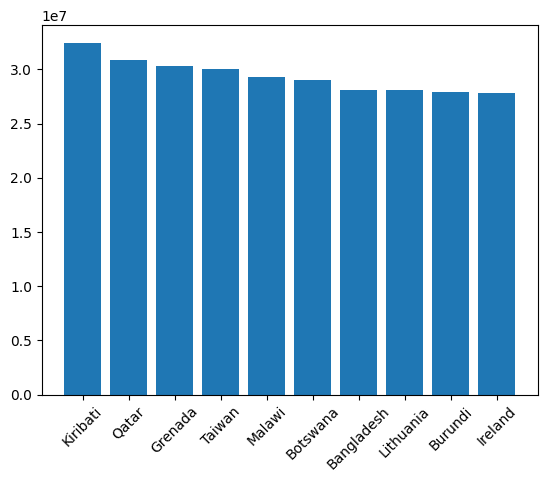

In [81]:
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show()